# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)

## ICU stay: predicting length-of-stay (LOS) with characteristics at admission

_David BERTOIN, Emmanuel GILSON, Vincent KERMOUNI, Paul MANGOLD, Dinh-Phong NGUYEN_

## Introduction

Intensive care unit (ICU) length of stay (LOS) is a frequent measure of ICU **resource use** and **performance** [1]. Predictions of ICU LOS are routinely used as the means of resource allocation because patients with prolonged ICU LOS account for a large proportion of resource use [2], and the early identification of the patients may help in future **planning**, such as determining discharge alternatives (e.g. long-term acute care facilities) or making sure the receiving ward after stabilization has enough available beds at the time of discharge. 

Nevertheless, prediction of ICU LOS is difficult and less studied than the prediction of mortality [3]. Prolonged stay in ICU not only **increases the overall costs** and **consumes more resources**, but also **limits the number of beds** available for use. In addition, patients, families, physicians and managers demand more informed health care information. In addition, predictive ICU models could be a building block in the larger process of making _do not resuscitate_ (DNR) decisions to determine whether to stop patient therapy to avoid unnecessary suffering and treatment costs [4].

The ability to predict LOS as an **initial assessment** of patients’ risk is therefore critical for better **resource planning and allocation**, especially when the resources are limited, as in ICUs, and can also facilitate management with **higher flexibility in hospital bed use** and better assessment in the **cost-effectiveness treatment**.

Thus, we believe ICU LOS to be a **very valuable key performance indicator (KPI)**, pertinent in all the critical hospital management fields mentioned above. The goal of this challenge is to predict ICU LOS with the help of patients' characteristics at admission in ICU. All data has been queried from the MIMIC-III database [4], an openly available dataset developed by the MIT Lab for Computational Physiology, comprising deidentified health data associated with ~40,000 critical care patients.

### Requirements

* numpy $\geq$ 1.10.0  
* matplotlib $\geq$ 1.5.0 
* pandas $\geq$ 0.19.0  
* scikit-learn $\geq$ 0.17 (different syntaxes for v0.17 and v0.18)   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### Loading data

In [2]:
train_filename = 'data/train.csv'
data = pd.read_csv(train_filename)
data['dob'] = pd.to_datetime(data['dob'])
data

,subject_id,hadm_id,icustay_id,gender,dob,admission_type,admission_location,insurance,language,religion,...,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,los
0,65481,145846,226129,F,2057-11-08,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,...,36.166667,37.666667,37.037037,97.0,100.0,98.608696,81.0,81.0,81.000000,1.2035
1,87980,134143,267226,M,2076-08-01,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,NOT SPECIFIED,...,36.611111,36.611111,36.611111,91.0,100.0,97.518519,91.0,166.0,140.666667,36.7345
2,2716,133009,222010,F,1898-10-05,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,NaN,UNOBTAINABLE,...,36.333334,37.777778,37.046297,45.0,100.0,95.903226,143.0,210.0,161.200000,1.1115
3,17308,108635,285051,F,2059-06-23,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,UNOBTAINABLE,...,37.055554,37.722223,37.490741,97.0,100.0,99.769231,78.0,124.0,95.666667,4.9805
4,58308,167254,285025,F,2149-11-29,EMERGENCY,EMERGENCY ROOM ADMIT,Medicaid,ENGL,NOT SPECIFIED,...,36.777778,37.222222,36.935185,94.0,98.0,95.846154,85.0,101.0,93.666667,1.5710
5,15285,181964,225117,M,2086-08-25,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,PROTESTANT QUAKER,...,36.111111,37.166668,36.500000,95.0,100.0,99.035714,82.0,269.0,150.181818,2.7636
6,11503,141190,231768,M,2115-01-11,EMERGENCY,EMERGENCY ROOM ADMIT,Self Pay,NaN,NaN,...,31.166666,39.299999,37.262540,99.0,100.0,99.976744,118.0,192.0,141.545455,1.9528
7,6710,168367,235017,F,2074-09-13,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Private,NaN,NOT SPECIFIED,...,36.388889,37.444445,37.074074,93.0,99.0,96.538462,112.0,123.0,117.500000,0.8114
8,5921,128142,259496,M,2110-01-16,EMERGENCY,EMERGENCY ROOM ADMIT,Medicaid,CAPE,NaN,...,37.444445,38.999998,38.231482,99.0,100.0,99.961538,105.0,124.0,114.750000,4.3632
9,44996,185433,257785,M,2061-12-27,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,PROTESTANT QUAKER,...,36.166667,36.888889,36.575758,94.0,100.0,98.138889,91.0,99.0,95.000000,1.6856


### Basic data exploration

In [3]:
data.dtypes

subject_id                       int64
hadm_id                          int64
icustay_id                       int64
gender                          object
dob                     datetime64[ns]
admission_type                  object
admission_location              object
insurance                       object
language                        object
religion                        object
marital_status                  object
ethnicity                       object
diagnosis                       object
hospital_expire_flag             int64
first_careunit                  object
last_wardid                      int64
heartrate_min                  float64
heartrate_max                  float64
heartrate_mean                 float64
sysbp_min                      float64
sysbp_max                      float64
sysbp_mean                     float64
diasbp_min                     float64
diasbp_max                     float64
diasbp_mean                    float64
meanbp_min               

In [4]:
data.describe()

,subject_id,hadm_id,icustay_id,hospital_expire_flag,last_wardid,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,...,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min,glucose_max,glucose_mean,los
count,35276.000000,35276.000000,35276.000000,35276.000000,35276.000000,35167.000000,35167.000000,35167.000000,35023.000000,35023.000000,...,34423.000000,34423.000000,34423.000000,35001.000000,35001.000000,35001.000000,34484.000000,34484.000000,34484.000000,35276.000000
mean,36934.634624,149899.067581,250055.123143,0.122576,29.703084,71.330246,103.845381,85.700310,91.987447,149.224281,...,36.096688,37.469008,36.816609,91.357718,99.540230,97.115994,107.709043,179.936579,138.993531,4.207501
std,29097.326900,28855.737873,28896.416309,0.327955,18.208234,15.544596,21.181211,16.097518,18.455180,24.160044,...,0.788928,0.802093,0.636776,8.870635,1.422286,2.756276,35.118567,102.630025,44.315661,6.400467
min,4.000000,100003.000000,200001.000000,0.000000,7.000000,0.350000,37.000000,32.760000,0.350000,45.000000,...,21.100000,30.700000,30.600000,0.500000,27.000000,11.166667,0.106000,21.000000,21.000000,0.063600
25%,13330.000000,124998.750000,225141.500000,0.000000,14.000000,61.000000,89.000000,74.412779,81.000000,132.000000,...,35.666667,36.944444,36.433333,91.000000,100.000000,96.125000,86.000000,126.000000,111.000000,1.213775
50%,26815.500000,149938.500000,250085.500000,0.000000,23.000000,70.000000,102.000000,84.500000,91.000000,146.000000,...,36.111111,37.388889,36.788889,93.000000,100.000000,97.521739,103.000000,160.000000,129.375000,2.154250
75%,60666.250000,174914.000000,275089.000000,0.000000,52.000000,81.000000,116.000000,95.740741,103.000000,163.000000,...,36.555557,37.944444,37.185186,95.000000,100.000000,98.689655,124.000000,204.000000,155.756944,4.214075
max,99999.000000,199998.000000,299999.000000,1.000000,57.000000,162.000000,280.000000,175.200000,181.000000,323.000000,...,40.833333,42.777778,40.833333,100.000000,100.000000,100.000000,592.000000,9999.000000,676.111111,173.072500


In [5]:
data.count()

subject_id              35276
hadm_id                 35276
icustay_id              35276
gender                  35276
dob                     35276
admission_type          35276
admission_location      35276
insurance               35276
language                23236
religion                34958
marital_status          33530
ethnicity               35276
diagnosis               35275
hospital_expire_flag    35276
first_careunit          35276
last_wardid             35276
heartrate_min           35167
heartrate_max           35167
heartrate_mean          35167
sysbp_min               35023
sysbp_max               35023
sysbp_mean              35023
diasbp_min              35022
diasbp_max              35022
diasbp_mean             35022
meanbp_min              35040
meanbp_max              35040
meanbp_mean             35040
resprate_min            34996
resprate_max            34996
resprate_mean           34996
tempc_min               34423
tempc_max               34423
tempc_mean

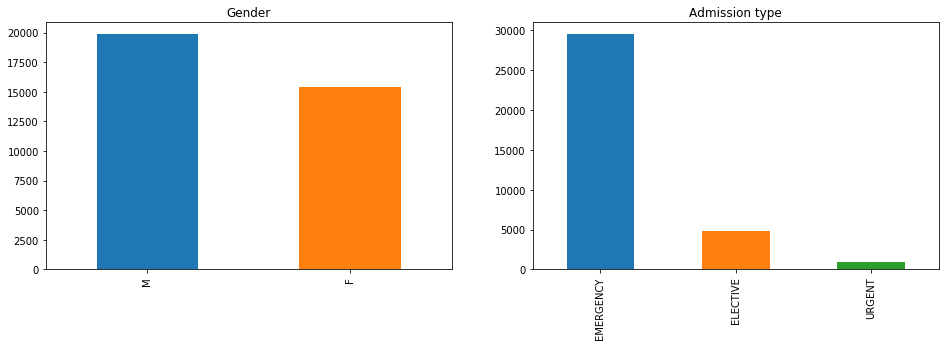

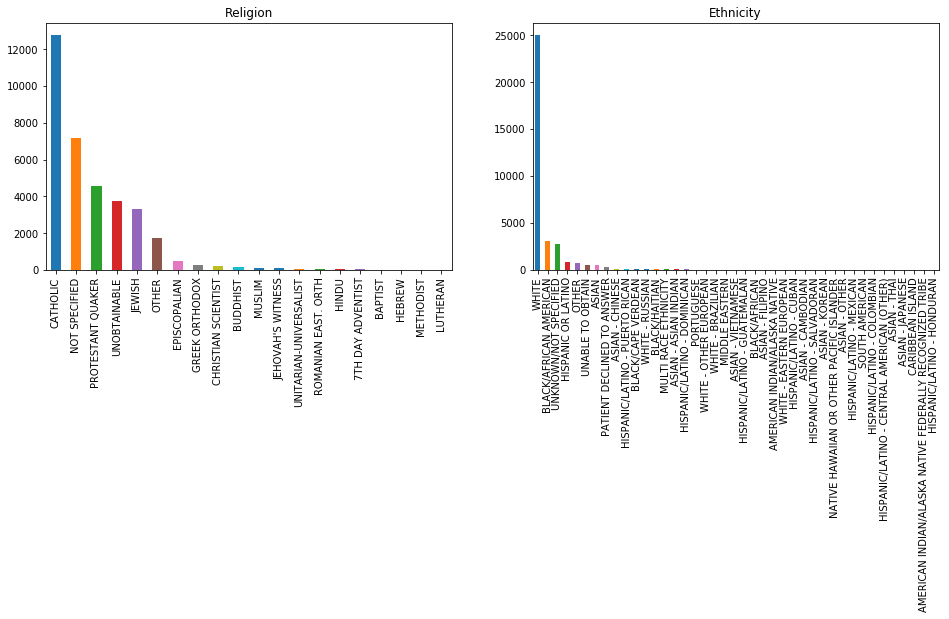

In [6]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.title('Gender')
data.gender.value_counts().plot(kind='bar')
plt.subplot(2,2,2)
plt.title('Admission type')
data.admission_type.value_counts().plot(kind='bar')
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.title('Religion')
data.religion.value_counts().plot(kind='bar')
plt.subplot(2,2,2)
plt.title('Ethnicity')
data.ethnicity.value_counts().plot(kind='bar')

## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files:   
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features). 
* a class `Regressor` to predict 

### Feature Extractor

The feature extractor implements a `transform` member function. It is saved in the file [`submissions/starting_kit/feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py). It receives the pandas dataframe `X_df` defined at the beginning of the notebook. It should produce a numpy array representing the extracted features, which will then be used for the classification.  

Note that the following code cells are *not* executed in the notebook. The notebook saves their contents in the file specified in the first line of the cell, so you can edit your submission before running the local test below and submitting it at the RAMP site.

In [7]:
%%file submissions/starting_kit/feature_extractor.py
# -*- coding: utf-8 -*-
import pandas as pd
import os

def fill_mean(feat):
    filled = feat.fillna(feat.mean())
    return filled

class FeatureExtractor(object):
    def __init__(self):
        pass
    
    def fit(self, X_df, y_array):
        pass

    def transform(self, X_df):
        features = ['heartrate_mean', 'sysbp_mean', 'diasbp_mean', 'resprate_mean', 'tempc_mean']
        X = X_df[features]
        heart = fill_mean(X.heartrate_mean)
        sbp = fill_mean(X.sysbp_mean)
        dbp = fill_mean(X.diasbp_mean)
        resp = fill_mean(X.resprate_mean)
        temp = fill_mean(X.tempc_mean)
        X = pd.concat([heart, sbp, dbp, resp, temp], axis=1)
        return X

Overwriting submissions/starting_kit/feature_extractor.py


### Regressor

The regressor follows a classical scikit-learn classifier template. It should be saved in the file [`submissions/starting_kit/classifier.py`](/submissions/starting_kit/regressor.py). In its simplest form it takes a scikit-learn pipeline, assigns it to `self.clf` in `__init__`, then calls its `fit` and `predict_proba` functions in the corresponding member funtions.

In [8]:
%%file submissions/starting_kit/regressor.py
# -*- coding: utf-8 -*-
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression


class Regressor(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.reg = LinearRegression()
        self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)

Overwriting submissions/starting_kit/regressor.py


## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `feature_extractor.py` and `regressor.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [19]:
!ramp_test_submission --quick-test

Testing ICU length-of-stay regression
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
	score  mare  rmse  rel_rmse
	train  1.12  4.69      1.71
	valid  1.64  3.74      2.18
	test   1.81  7.07      3.18
CV fold 1
	score  mare  rmse  rel_rmse
	train  1.17  4.83      1.71
	valid  1.17  2.76      1.81
	test   1.71  7.03      2.95
----------------------------
Mean CV scores
----------------------------
	score          mare          rmse      rel_rmse
	train  1.14 ± 0.022  4.76 ± 0.071    1.71 ± 0.0
	valid   1.4 ± 0.234  3.25 ± 0.487  1.99 ± 0.189
	test   1.76 ± 0.047  7.05 ± 0.023  3.06 ± 0.113
----------------------------
Bagged scores
----------------------------
	score  mare
	valid  1.39
	test   1.76


### References

[1] Rhodes A, Moreno RP, Azoulay E et al.  . Prospectively defined indicators to improve the safety and quality of care for critically ill patients: a report from the Task Force on Safety and Quality of the European Society of Intensive Care Medicine (ESICM). Intensive Care Med  2012;38:598–605

[2] Stricker K, Rothen HU, Takala J. Resource use in the ICU: short- vs. long-term patients. Acta Anaesthesiol Scand  2003;47:508–15

[3] Perez A, Chan W, Dennis RJ. Predicting the length of stay of patients admitted for intensive care using a first step analysis. Health Service Outcomes and Research. 2006;6:127–138

[4] MIMIC-III, a freely accessible critical care database. Johnson AEW, Pollard TJ, Shen L, Lehman L, Feng M, Ghassemi M, Moody B, Szolovits P, Celi LA, and Mark RG. Scientific Data (2016). DOI: 10.1038/sdata.2016.35. Available at: http://www.nature.com/articles/sdata201635

[5] Pei-Fang (Jennifer) Tsai, Po-Chia Chen, Yen-You Chen, et al., Length of Hospital Stay Prediction at the Admission Stage for Cardiology Patients Using Artificial Neural Network, Journal of Healthcare Engineering, vol. 2016, Article ID 7035463, 11 pages, 2016. doi:10.1155/2016/7035463